# Benchmarking: retrieving and comparing against reference results

You can access all the latest results for classification, clustering and
regression directly with ``aeon``. These results are all stored on the website
[timeseriesclassification.com](https://timeseriesclassification.com). This notebook
is about recovering the latest results. Because of software changes, these may vary
slightly from published results. If you want to recover published results, see the notebook 
on [loading published results](./published_results.ipynb). We update the results as we 
get them. If you want to see the latest results, they are listed 
[here](https://timeseriesclassification.com/).

These are the current estimators with results available:

In [1]:
from aeon.benchmarking.results_loaders import get_available_estimators

get_available_estimators(task="classification")

,classification
0,1NN-DTW
1,Arsenal
2,BOSS
3,CIF
4,CNN
5,Catch22
6,DrCIF
7,EE
8,FreshPRINCE
9,GRAIL


In [2]:
get_available_estimators(task="regression")

,regression
0,1NN-DTW
1,1NN-ED
2,5NN-DTW
3,5NN-ED
4,CNN
5,DrCIF
6,FCN
7,FPCR
8,FPCR-b-spline
9,FreshPRINCE


In [3]:
get_available_estimators(task="clustering")

,clustering
0,dtw-dba
1,kmeans-ddtw
2,kmeans-dtw
3,kmeans-ed
4,kmeans-edr
5,kmeans-erp
6,kmeans-lcss
7,kmeans-msm
8,kmeans-twe
9,kmeans-wddtw


## Loading results (classification example)

We will use the classification task as an example. We will recover the results for
FreshPRINCE [[4]](#references) a pipeline of TSFresh transform followed by a rotation forest classifier.
InceptionTimeClassifier [[5]](#references) is a deep learning ensemble. HIVECOTEV2 [[6]](#references) is a meta
ensemble of four different ensembles built on different representations. RDST [[7]](#references)
extracts random shalepets with dilation to form a pipeline.

See [[1]](#references) for an overview of recent advances in time series classification. We also store 
results for other learning tasks, such as regression [[2]](#references) and clustering [[3]](#references).

If you do not set `path`, results are loaded from https://timeseriesclassification.com/results/ReferenceResults.
You can download the files directly from there. To read locally, set the `path` variable.
While we don't show this here, the `task` parameter can be set to `regression` or 
`clustering` to recover those results.

In [4]:
classifiers = [
    "FreshPRINCEClassifier",
    "HIVECOTEV2",
    "InceptionTimeClassifier",
    "RDSTClassifier",
]
datasets = ["ACSF1", "ArrowHead", "GunPoint", "ItalyPowerDemand"]

The `get_estimator_results` function returns the resutls as a dictionary of dictionaries, where the first key is the classifier name and the second key is the dataset name.

In [5]:
from aeon.benchmarking.results_loaders import get_estimator_results

results_dict = get_estimator_results(estimators=classifiers, datasets=datasets)
results_dict["HIVECOTEV2"]["ItalyPowerDemand"]

0.9698736637512148

Most results files have multiple resamples. These can be returned as an array using the `num_resamples` parameter.

In [6]:
results_dict = get_estimator_results(
    estimators=classifiers, datasets=datasets, num_resamples=30
)
results_dict["HIVECOTEV2"]["ItalyPowerDemand"]

array([0.96987366, 0.96987366, 0.9494655 , 0.96793003, 0.96015549,
       0.96793003, 0.96793003, 0.95626822, 0.96695821, 0.96695821,
       0.96793003, 0.96695821, 0.95724004, 0.94557823, 0.96987366,
       0.96598639, 0.96501458, 0.96015549, 0.9718173 , 0.96793003,
       0.96598639, 0.95626822, 0.96112731, 0.96695821, 0.96209913,
       0.95918367, 0.96209913, 0.95918367, 0.95043732, 0.96598639])

Different measures can be recovered, such as accuracy, F1, AUROC, and logloss 
using the `measure` parameter. The default is accuracy.

In [7]:
results_dict = get_estimator_results(
    estimators=classifiers, datasets=datasets, measure="logloss"
)
results_dict["HIVECOTEV2"]["ItalyPowerDemand"]

0.1217826955959029

Results can also be returned as an array using the `get_estimator_results_as_array` function. 
This function shares the same parameters as `get_estimator_results`.

This function returns the results as a numpy array, where the first dimension is the dataset and 
the second dimension is the estimator. The datasets used in the array are returned as a list 
alongside the results. 

Multiple resamples will be averaged instead of returned as separate arrays.

In [8]:
from aeon.benchmarking.results_loaders import get_estimator_results_as_array

results_arr, datasets = get_estimator_results_as_array(
    estimators=classifiers, datasets=datasets
)
results_arr

array([[0.89      , 0.91      , 0.91      , 0.9       ],
       [0.62857143, 0.86857143, 0.86285714, 0.85714286],
       [0.94      , 1.        , 1.        , 1.        ],
       [0.89795918, 0.96987366, 0.96598639, 0.93974733]])

In [9]:
datasets

['ACSF1', 'ArrowHead', 'GunPoint', 'ItalyPowerDemand']

By default if a dataset is missing for any estimator, the dataset is removed
from the results and list of datasets. If you want to keep the dataset, use the
`include_missing` parameter. Missing results will be filled with a NaN value.

In [10]:
from aeon.benchmarking.results_loaders import get_estimator_results_as_array

results_arr_miss, datasets = get_estimator_results_as_array(
    estimators=classifiers, datasets=datasets + ["invalid"], include_missing=True
)
results_arr_miss

array([[0.89      , 0.91      , 0.91      , 0.9       ],
       [0.62857143, 0.86857143, 0.86285714, 0.85714286],
       [0.94      , 1.        , 1.        , 1.        ],
       [0.89795918, 0.96987366, 0.96598639, 0.93974733],
       [       nan,        nan,        nan,        nan]])

For both methods, the default value for `datasets` will load all available datasets for the estimators. We will use this for our later examples.

In [11]:
results_arr, datasets = get_estimator_results_as_array(
    estimators=classifiers, num_resamples=30
)
results_arr

array([[0.72683761, 0.84384615, 0.85982906, 0.84709402],
       [0.93189143, 0.9551145 , 0.95808312, 0.92726039],
       [0.77272727, 0.74848485, 0.78095238, 0.72251082],
       [0.91486486, 0.93774775, 0.94297297, 0.94738739],
       [0.92333333, 0.94833333, 0.95166667, 0.91333333],
       [0.87177849, 0.92846113, 0.88056443, 0.93176251],
       [0.95555556, 0.99844444, 0.99511111, 0.99488889],
       [0.99388186, 0.99978903, 0.99831224, 0.99978903],
       [0.75083933, 0.74676259, 0.73117506, 0.73884892],
       [0.71570513, 0.92964744, 0.90528846, 0.90721154],
       [0.96077098, 0.96303855, 0.96034985, 0.95118238],
       [1.        , 1.        , 1.        , 1.        ],
       [0.83345411, 0.8281401 , 0.81533816, 0.81594203],
       [0.77762889, 0.80081891, 0.77321794, 0.79669645],
       [0.79111111, 0.72111111, 0.68222222, 0.74222222],
       [0.9952381 , 1.        , 0.9968254 , 1.        ],
       [0.76872325, 0.78963335, 0.77076121, 0.77374837],
       [0.89691358, 0.94135802,

If you have any questions about these results or the datasets, the best place to 
raise an issue is on the associated [repo](https://github.com/time-series-machine-learning/tsml-repo).


## Plotting results

Once you have the results you want, you can compare classifiers with built-in `aeon` tools. 
 
For example, you can draw a critical difference diagram [[8]](#references). This displays
the average rank of each estimator over all datasets. It then groups estimators for
which there is no significant difference in rank into cliques, shown with a solid
bar. The diagram below has been performed using pairwise Wilcoxon signed-rank tests and 
forms cliques using the Holm correction for multiple testing as described in [[9, 10]](#references). Alpha value 
is 0.05 (default value).

In the example below using our data loaded above, InceptionTimeClassifier and RDSTClassifier 
are not significantly different in ranking. FreshPRINCEClassifier is signigicantly worse than all 
classifiers, while HIVECOTEV2 is significantly better than all.

(<Figure size 600x230 with 1 Axes>, <Axes: >)

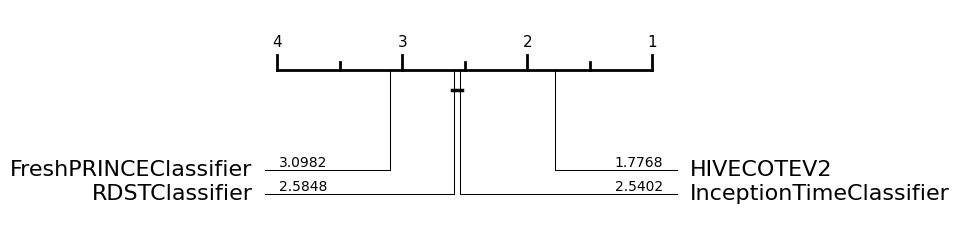

In [12]:
from aeon.visualisation import plot_critical_difference

plot_critical_difference(results_arr, classifiers, test="wilcoxon", correction="holm")

Besides plotting differences using the critical difference diagrams, different versions of boxplots can be plotted. Boxplots graphically demonstrates the locality, spread and skewness of the results.

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

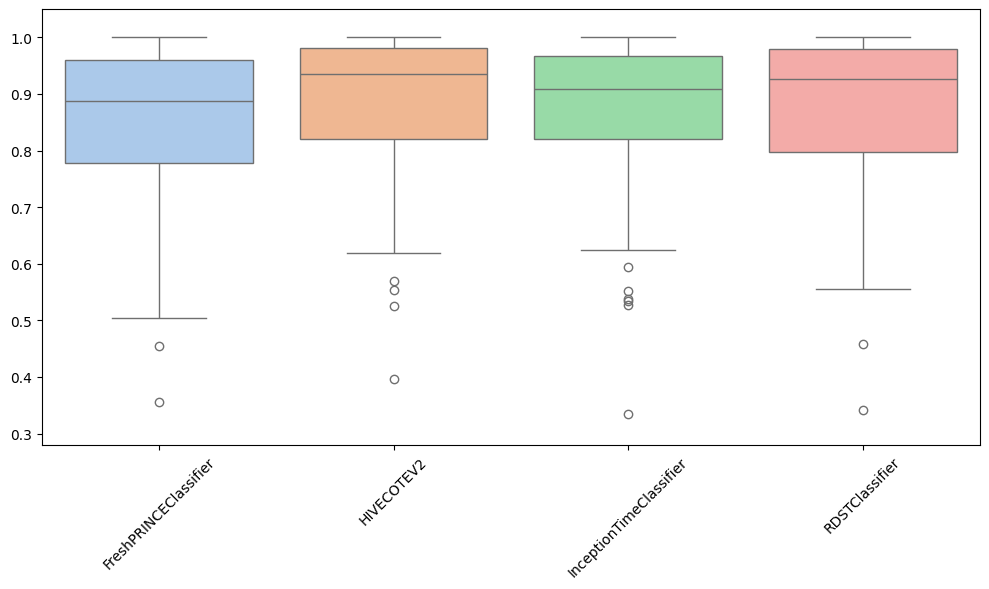

In [13]:
from aeon.visualisation import plot_boxplot

plot_boxplot(
    results_arr,
    classifiers,
    plot_type="boxplot",
)

From the critical difference diagram above, we showed that InceptionTimeClassifier is not significantly better than RDSTClassifier. Now, if we want to specifically compare the results of these two approaches, we can plot a scatter in which each point is a pair of accuracies of both approaches. The number of W, T, and L is also included per approach in the legend.

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='InceptionTimeClassifier accuracy\n(mean: 0.8743)', ylabel='RDSTClassifier accuracy\n(mean: 0.8763)'>)

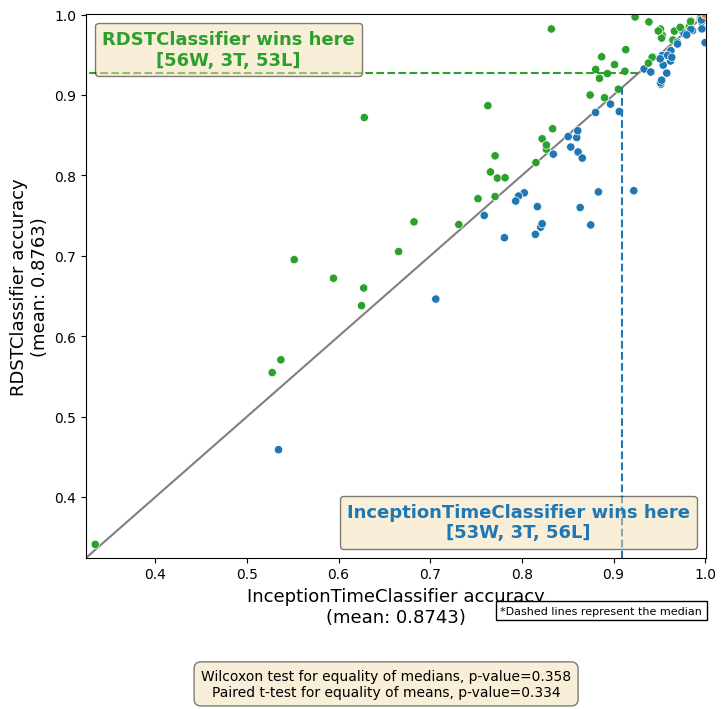

In [14]:
from aeon.visualisation import plot_pairwise_scatter

plot_pairwise_scatter(
    results_arr[:, 2],
    results_arr[:, 3],
    classifiers[2],
    classifiers[3],
)

## References

[1] Middlehurst, M., Schäfer, P. and Bagnall, A., 2024. Bake off redux: a review and experimental evaluation of recent time series classification algorithms. Data Mining and Knowledge Discovery, pp.1-74.

[2] Holder, C., Middlehurst, M. and Bagnall, A., 2024. A review and evaluation of elastic distance functions for time series clustering. Knowledge and Information Systems, 66(2), pp.765-809.

[3] Guijo-Rubio, D., Middlehurst, M., Arcencio, G., Silva, D.F. and Bagnall, A., 2024. Unsupervised feature based algorithms for time series extrinsic regression. Data Mining and Knowledge Discovery, pp.1-45.

[4] Middlehurst, M. and Bagnall, A., 2022, May. The freshprince: A simple transformation based pipeline time series classifier. In International Conference on Pattern Recognition and Artificial Intelligence (pp. 150-161). Cham: Springer International Publishing.

[5] Ismail Fawaz, H., Lucas, B., Forestier, G., Pelletier, C., Schmidt, D.F., Weber, J., Webb, G.I., Idoumghar, L., Muller, P.A. and Petitjean, F., 2020. Inceptiontime: Finding alexnet for time series classification. Data Mining and Knowledge Discovery, 34(6), pp.1936-1962.

[6] Middlehurst, M., Large, J., Flynn, M., Lines, J., Bostrom, A. and Bagnall, A., 2021. HIVE-COTE 2.0: a new meta ensemble for time series classification. Machine Learning, 110(11), pp.3211-3243.

[7] Guillaume, A., Vrain, C. and Elloumi, W., 2022, June. Random dilated shapelet transform: A new approach for time series shapelets. In International Conference on Pattern Recognition and Artificial Intelligence (pp. 653-664). Cham: Springer International Publishing.

[8] Garcia, S. and Herrera, F., 2008. An Extension on" Statistical Comparisons of Classifiers over Multiple Data Sets" for all Pairwise Comparisons. Journal of machine learning research, 9(12).

[9] Benavoli, A., Corani, G. and Mangili, F., 2016. Should we really use post-hoc tests based on mean-ranks?. The Journal of Machine Learning Research, 17(1), pp.152-161.

[10] Demšar, J., 2006. Statistical comparisons of classifiers over multiple data sets. The Journal of Machine learning research, 7, pp.1-30.
